'51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249', '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493'

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드

In [2]:
환자 = pd.read_csv('/project/data/폐렴환자.csv', )
환자 = 환자[['SUBJECT_ID', 'EXPIRE_FLAG']]
환자

,SUBJECT_ID,EXPIRE_FLAG
0,252,0
1,253,0
2,268,1
3,269,0
4,665,1
...,...,...
7802,43932,1
7803,43937,1
7804,43959,0
7805,43982,0


In [3]:
lab = pd.read_csv('/project/data/폐렴환자lab.csv')
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,NaN
...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,abnormal


# 생존여부와 JOIN

In [4]:
data = pd.merge(left = 환자 , right = lab, how = "inner", on = "SUBJECT_ID")
data = data[['SUBJECT_ID','ITEMID','CHARTTIME','FLAG','EXPIRE_FLAG']]
data['FLAG'] = data['FLAG'].str.replace('delta', 'nan')

In [5]:
data.shape

(9356349, 5)

In [6]:
data.head()

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,252,51237,2133-04-07 04:14:00,NaN,0
1,252,51248,2133-04-07 04:14:00,NaN,0
2,252,51249,2133-04-07 04:14:00,NaN,0
3,252,51250,2133-04-07 04:14:00,NaN,0
4,252,51265,2133-04-07 04:14:00,abnormal,0


# 전처리 - time

In [7]:
#시간 부분 제거, date 부분만 남김
import datetime as dt
data['CHARTTIME'] = pd.to_datetime(data['CHARTTIME'])
data['CHARTTIME'] = data['CHARTTIME'].dt.date

In [8]:
data.head()

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,252,51237,2133-04-07,NaN,0
1,252,51248,2133-04-07,NaN,0
2,252,51249,2133-04-07,NaN,0
3,252,51250,2133-04-07,NaN,0
4,252,51265,2133-04-07,abnormal,0


# 중복제거
- 이전과 다르게 time 전처리 후 중복제거

In [9]:
print("제거할 데이터 개수:", data.duplicated().sum())
print("중복 제거 전 shape:", data.shape)

data.drop_duplicates(inplace=True)
print("모두 중복되는 샘플 제거 후 shape:", data.shape)

제거할 데이터 개수: 1948235
중복 제거 전 shape: (9356349, 5)
모두 중복되는 샘플 제거 후 shape: (7408114, 5)


In [10]:
data = data.sort_values(['SUBJECT_ID','CHARTTIME']).reset_index(drop=True)
data = data.set_index('SUBJECT_ID')
data

,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
SUBJECT_ID,,,,
9,50856,2149-11-09,NaN,1
9,50868,2149-11-09,NaN,1
9,50879,2149-11-09,NaN,1
9,50880,2149-11-09,NaN,1
9,50882,2149-11-09,abnormal,1
...,...,...,...,...
99985,51006,2182-03-14,abnormal,0
99985,51146,2182-03-14,NaN,0
99985,51200,2182-03-14,NaN,0


# dict 생성 (sub, item, final_date)

In [11]:
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{9: 0,
 21: 1,
 31: 2,
 36: 3,
 37: 4,
 41: 5,
 68: 6,
 85: 7,
 94: 8,
 101: 9,
 103: 10,
 105: 11,
 109: 12,
 111: 13,
 112: 14,
 117: 15,
 124: 16,
 136: 17,
 148: 18,
 156: 19,
 157: 20,
 164: 21,
 166: 22,
 175: 23,
 177: 24,
 184: 25,
 186: 26,
 188: 27,
 191: 28,
 203: 29,
 208: 30,
 211: 31,
 214: 32,
 221: 33,
 222: 34,
 223: 35,
 224: 36,
 225: 37,
 231: 38,
 242: 39,
 248: 40,
 252: 41,
 253: 42,
 268: 43,
 269: 44,
 274: 45,
 283: 46,
 286: 47,
 290: 48,
 303: 49,
 305: 50,
 308: 51,
 323: 52,
 328: 53,
 330: 54,
 346: 55,
 356: 56,
 357: 57,
 360: 58,
 364: 59,
 366: 60,
 368: 61,
 370: 62,
 391: 63,
 404: 64,
 412: 65,
 423: 66,
 425: 67,
 426: 68,
 433: 69,
 434: 70,
 450: 71,
 452: 72,
 453: 73,
 457: 74,
 458: 75,
 481: 76,
 482: 77,
 492: 78,
 497: 79,
 499: 80,
 505: 81,
 507: 82,
 508: 83,
 509: 84,
 510: 85,
 514: 86,
 518: 87,
 530: 88,
 536: 89,
 538: 90,
 544: 91,
 546: 92,
 550: 93,
 565: 94,
 571: 95,
 576: 96,
 580: 97,
 586: 98,
 592: 99,
 596: 100,
 605: 101

In [17]:
data['ITEMID']

SUBJECT_ID
9        50856
9        50868
9        50879
9        50880
9        50882
         ...  
99985    51006
99985    51146
99985    51200
99985    51221
99985    51222
Name: ITEMID, Length: 7408114, dtype: int64

## admission - final

In [13]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [14]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

In [15]:
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{9: datetime.date(2149, 11, 14),
 21: datetime.date(2135, 2, 8),
 31: datetime.date(2108, 8, 30),
 36: datetime.date(2134, 5, 20),
 37: datetime.date(2183, 8, 26),
 41: datetime.date(2133, 1, 27),
 68: datetime.date(2174, 1, 19),
 85: datetime.date(2167, 7, 30),
 94: datetime.date(2176, 9, 25),
 101: datetime.date(2196, 10, 12),
 103: datetime.date(2144, 9, 1),
 105: datetime.date(2189, 2, 25),
 109: datetime.date(2142, 8, 30),
 111: datetime.date(2144, 7, 1),
 112: datetime.date(2196, 9, 29),
 117: datetime.date(2133, 12, 1),
 124: datetime.date(2166, 2, 1),
 136: datetime.date(2103, 5, 14),
 148: datetime.date(2107, 10, 8),
 156: datetime.date(2121, 1, 27),
 157: datetime.date(2106, 6, 24),
 164: datetime.date(2117, 1, 16),
 166: datetime.date(2105, 1, 24),
 175: datetime.date(2184, 1, 31),
 177: datetime.date(2125, 12, 12),
 184: datetime.date(2168, 5, 13),
 186: datetime.date(2176, 10, 1),
 188: datetime.date(2162, 1, 17),
 191: datetime.date(2196, 4, 21),
 203: datetime.date(2160,

## length

In [16]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  7799
dic_item2idx length :  690
dic_sub2final_date length :  7799


In [185]:
itemid = ['51277', '50912', '51006', '51003', '51248', '50983','51237', '51275', '50862', '51249',
          '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493']
itemid = list(map(int, itemid))

In [186]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19}

## 최종 for문

In [187]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,20))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.188274880250295 분
378098.0


In [188]:
x.shape

(7799, 10, 20)

In [189]:
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19}

# LSTM - ITEM 20개

In [190]:
label = np.load("3d_array_label.npy")

In [191]:
arr.shape, label.shape

((7799, 10, 300), (7799, 1))

In [192]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 20), (6240, 1), (1559, 10, 20), (1559, 1))

In [193]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [194]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 10, 12)            1584      
_________________________________________________________________
lstm_21 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 2,797
Trainable params: 2,797
Non-trainable params: 0
_________________________________________________________________
None


In [195]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 2s 20ms/step - loss: 0.7672 - acc: 0.5537 - val_loss: 0.8450 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6846 - acc: 0.6918 - val_loss: 0.8300 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6742 - acc: 0.6837 - val_loss: 0.8315 - val_acc: 0.4974
Epoch 4/200
37/37 [==============================] - 0s 6ms/step - loss: 0.6510 - acc: 0.6935 - val_loss: 0.8080 - val_acc: 0.4974
Epoch 5/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6422 - acc: 0.6837 - val_loss: 0.7915 - val_acc: 0.5032
Epoch 6/200
37/37 [==============================] - 0s 6ms/step - loss: 0.6326 - acc: 0.6867 - val_loss: 0.8033 - val_acc: 0.5058
Epoch 7/200
37/37 [==============================] - 0s 6ms/step - loss: 0.6082 - acc: 0.7082 - val_loss: 0.8015 - val_acc: 0.5115
Epoch 8/200
37/37 [==============================] - 0s 6ms/step - loss: 0.6162 - 

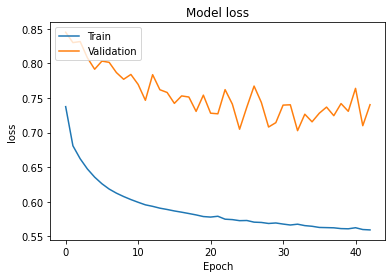

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

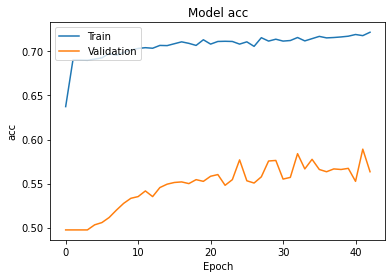

In [197]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [198]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [199]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.5445798588838999


In [200]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 10, 256)           283648    
_________________________________________________________________
lstm_23 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 480,897
Trainable params: 480,897
Non-trainable params: 0
_________________________________________________________________
None


In [201]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 3s 146ms/step - loss: 0.6619 - acc: 0.5832 - val_loss: 0.8064 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 91ms/step - loss: 0.6068 - acc: 0.6869 - val_loss: 0.7972 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5969 - acc: 0.6829 - val_loss: 0.7641 - val_acc: 0.4696
Epoch 4/200
10/10 [==============================] - 1s 91ms/step - loss: 0.5851 - acc: 0.6871 - val_loss: 0.7759 - val_acc: 0.4840
Epoch 5/200
10/10 [==============================] - 1s 91ms/step - loss: 0.5718 - acc: 0.6984 - val_loss: 0.7040 - val_acc: 0.5088
Epoch 6/200
10/10 [==============================] - 1s 90ms/step - loss: 0.5740 - acc: 0.6979 - val_loss: 0.7206 - val_acc: 0.4952
Epoch 7/200
10/10 [==============================] - 1s 90ms/step - loss: 0.5697 - acc: 0.6915 - val_loss: 0.7473 - val_acc: 0.5128
Epoch 8/200
10/10 [==============================] - 1s 89ms/step - loss: 0

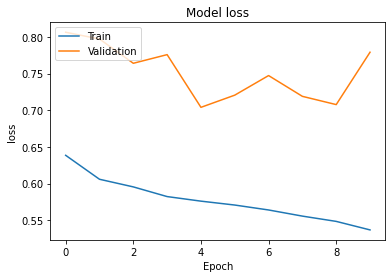

In [202]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

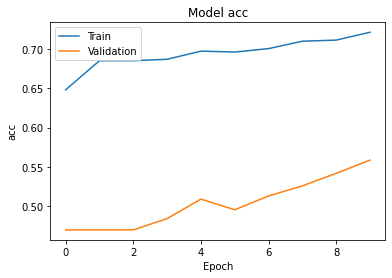

In [203]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [204]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [205]:
pred.shape

(1559, 1)

In [206]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.5625400898011546


# ITEM 30개

'51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249',
'51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493',
'50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863'

In [207]:
itemid = ['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249',
          '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493',
          '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863']
itemid = list(map(int, itemid))

In [208]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29}

In [209]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,30))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.20120085875193278 분
428935.0


In [210]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 30), (6240, 1), (1559, 10, 30), (1559, 1))

In [211]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [212]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 10, 12)            2064      
_________________________________________________________________
lstm_25 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 3,277
Trainable params: 3,277
Non-trainable params: 0
_________________________________________________________________
None


In [213]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 21ms/step - loss: 0.7960 - acc: 0.4774 - val_loss: 0.8025 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 8ms/step - loss: 0.7026 - acc: 0.6805 - val_loss: 0.8533 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6666 - acc: 0.6942 - val_loss: 0.8143 - val_acc: 0.4974
Epoch 4/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6452 - acc: 0.6910 - val_loss: 0.8007 - val_acc: 0.5000
Epoch 5/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6295 - acc: 0.6924 - val_loss: 0.7935 - val_acc: 0.5103
Epoch 6/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6159 - acc: 0.7000 - val_loss: 0.7821 - val_acc: 0.5179
Epoch 7/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6083 - acc: 0.7085 - val_loss: 0.7737 - val_acc: 0.5288
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5929 - 

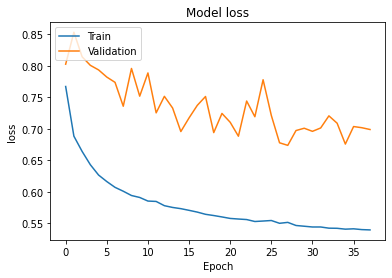

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

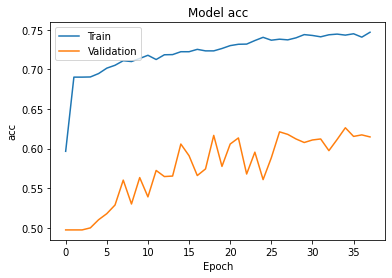

In [215]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [216]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [217]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.5856318152661962


In [218]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 10, 256)           293888    
_________________________________________________________________
lstm_27 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 491,137
Trainable params: 491,137
Non-trainable params: 0
_________________________________________________________________
None


In [219]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 3s 148ms/step - loss: 0.6526 - acc: 0.6841 - val_loss: 0.7804 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 92ms/step - loss: 0.6037 - acc: 0.6883 - val_loss: 0.8057 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5878 - acc: 0.6909 - val_loss: 0.7355 - val_acc: 0.4696
Epoch 4/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5850 - acc: 0.6851 - val_loss: 0.7158 - val_acc: 0.4720
Epoch 5/200
10/10 [==============================] - 1s 93ms/step - loss: 0.5755 - acc: 0.6900 - val_loss: 0.7125 - val_acc: 0.4832
Epoch 6/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5701 - acc: 0.6928 - val_loss: 0.7490 - val_acc: 0.4920
Epoch 7/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5520 - acc: 0.7052 - val_loss: 0.6792 - val_acc: 0.5561
Epoch 8/200
10/10 [==============================] - 1s 93ms/step - loss: 0

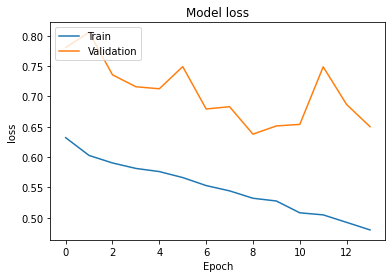

In [220]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

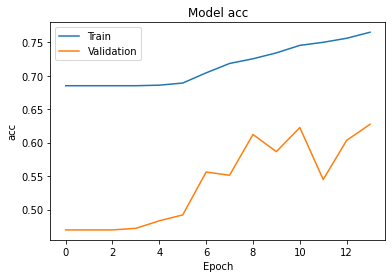

In [221]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [222]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [223]:
pred.shape

(1559, 1)

In [224]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.622193713919179


# ITEM 50개

In [225]:
itemid = ['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249',
          '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493',
          '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863',
          '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902',
          '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953']
itemid = list(map(int, itemid))

In [226]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29,
 51200: 30,
 51514: 31,
 50909: 32,
 50804: 33,
 51214: 34,
 50882: 35,
 50806: 36,
 50963: 37,
 50820: 38,
 50902: 39,
 50956: 40,
 50911: 41,
 50952: 42,
 50818: 43,
 51144: 44,
 51000: 45,
 50821: 46,
 50824: 47,
 51274: 48,
 50953: 49}

In [227]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,50))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.20280245542526246 분
509570.0


In [228]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 50), (6240, 1), (1559, 10, 50), (1559, 1))

In [229]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [230]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 10, 12)            3024      
_________________________________________________________________
lstm_29 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 13        
Total params: 4,237
Trainable params: 4,237
Non-trainable params: 0
_________________________________________________________________
None


In [231]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 2s 21ms/step - loss: 0.7350 - acc: 0.6872 - val_loss: 0.8619 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6865 - acc: 0.6967 - val_loss: 0.8414 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6597 - acc: 0.6937 - val_loss: 0.8061 - val_acc: 0.5019
Epoch 4/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6405 - acc: 0.6798 - val_loss: 0.8070 - val_acc: 0.5103
Epoch 5/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6117 - acc: 0.7028 - val_loss: 0.7482 - val_acc: 0.5500
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6061 - acc: 0.7062 - val_loss: 0.7459 - val_acc: 0.5564
Epoch 7/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6047 - acc: 0.7061 - val_loss: 0.7516 - val_acc: 0.5647
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5930 - 

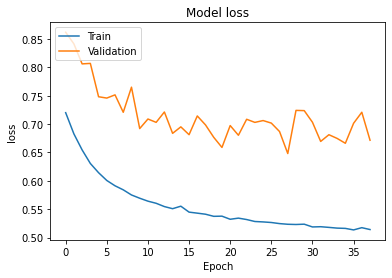

In [232]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

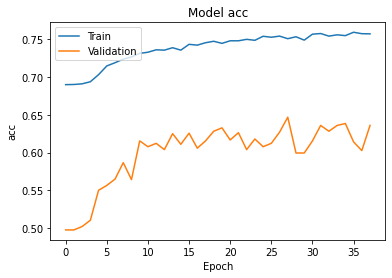

In [233]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [234]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [235]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6311738293778063


In [236]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 10, 256)           314368    
_________________________________________________________________
lstm_31 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 511,617
Trainable params: 511,617
Non-trainable params: 0
_________________________________________________________________
None


In [237]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 3s 148ms/step - loss: 0.6610 - acc: 0.5804 - val_loss: 0.7933 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 92ms/step - loss: 0.6053 - acc: 0.6759 - val_loss: 0.8064 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 93ms/step - loss: 0.5785 - acc: 0.6920 - val_loss: 0.7449 - val_acc: 0.4696
Epoch 4/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5712 - acc: 0.6790 - val_loss: 0.7330 - val_acc: 0.4848
Epoch 5/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5486 - acc: 0.6972 - val_loss: 0.7672 - val_acc: 0.4944
Epoch 6/200
10/10 [==============================] - 1s 92ms/step - loss: 0.5322 - acc: 0.7108 - val_loss: 0.7328 - val_acc: 0.5409
Epoch 7/200
10/10 [==============================] - 1s 93ms/step - loss: 0.5228 - acc: 0.7241 - val_loss: 0.6904 - val_acc: 0.5721
Epoch 8/200
10/10 [==============================] - 1s 94ms/step - loss: 0

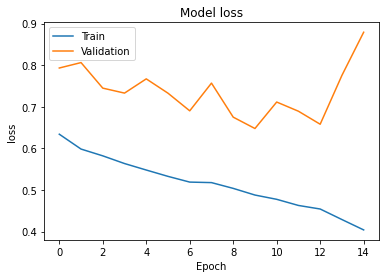

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

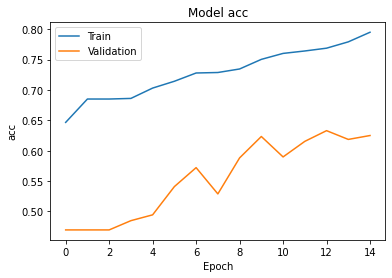

In [239]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [240]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [241]:
pred.shape

(1559, 1)

In [242]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6292495189223861


# ITEMID 100개

In [243]:
itemid = ['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249',
          '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493',
          '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863',
          '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902',
          '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953',
          '51251', '50998', '50924', '50867', '51143', '50852', '50893', '51244', '50967', '51256',
          '50885', '50935', '50993', '50922', '50970', '50908', '50917', '50889', '50964', '51479',
          '51255', '51010', '51301', '51498', '50803', '50976', '51288', '51002', '51257', '51362',
          '50883', '51283', '51007', '51196', '51099', '50907', '51491', '51018', '51218', '50929',
          '50995', '51436', '51221', '50965', '50931', '50927', '51008', '50866', '51427', '51457']
itemid = list(map(int,itemid))

In [244]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29,
 51200: 30,
 51514: 31,
 50909: 32,
 50804: 33,
 51214: 34,
 50882: 35,
 50806: 36,
 50963: 37,
 50820: 38,
 50902: 39,
 50956: 40,
 50911: 41,
 50952: 42,
 50818: 43,
 51144: 44,
 51000: 45,
 50821: 46,
 50824: 47,
 51274: 48,
 50953: 49,
 51251: 50,
 50998: 51,
 50924: 52,
 50867: 53,
 51143: 54,
 50852: 55,
 50893: 56,
 51244: 57,
 50967: 58,
 51256: 59,
 50885: 60,
 50935: 61,
 50993: 62,
 50922: 63,
 50970: 64,
 50908: 65,
 50917: 66,
 50889: 67,
 50964: 68,
 51479: 69,
 51255: 70,
 51010: 71,
 51301: 72,
 51498: 73,
 50803: 74,
 50976: 75,
 51288: 76,
 51002: 77,
 51257: 78,
 51362: 79,
 50883: 80,
 51283: 81,
 51007: 82,
 51196: 83,
 5

In [245]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,100))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.19845921993255616 분
608250.0


In [246]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 100), (6240, 1), (1559, 10, 100), (1559, 1))

In [247]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [248]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 10, 12)            5424      
_________________________________________________________________
lstm_33 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
Total params: 6,637
Trainable params: 6,637
Non-trainable params: 0
_________________________________________________________________
None


In [249]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 21ms/step - loss: 0.7754 - acc: 0.6771 - val_loss: 0.8617 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6980 - acc: 0.6865 - val_loss: 0.8188 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6444 - acc: 0.6983 - val_loss: 0.7672 - val_acc: 0.5128
Epoch 4/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6232 - acc: 0.6912 - val_loss: 0.7853 - val_acc: 0.5391
Epoch 5/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6019 - acc: 0.7127 - val_loss: 0.7625 - val_acc: 0.5647
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5858 - acc: 0.7258 - val_loss: 0.7364 - val_acc: 0.5891
Epoch 7/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5698 - acc: 0.7368 - val_loss: 0.7069 - val_acc: 0.6128
Epoch 8/200
37/37 [==============================] - 0s 7ms/step - loss: 0.5606 - 

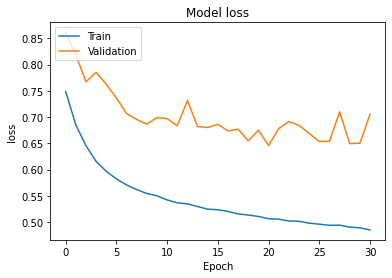

In [250]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

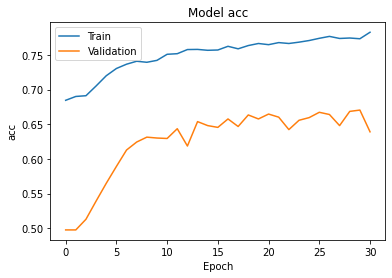

In [251]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [252]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [253]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6452854393842207


In [254]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 10, 256)           365568    
_________________________________________________________________
lstm_35 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 562,817
Trainable params: 562,817
Non-trainable params: 0
_________________________________________________________________
None


In [255]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 3s 150ms/step - loss: 0.6519 - acc: 0.5900 - val_loss: 0.7714 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5929 - acc: 0.6841 - val_loss: 0.7984 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5864 - acc: 0.6740 - val_loss: 0.7973 - val_acc: 0.4696
Epoch 4/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5593 - acc: 0.6827 - val_loss: 0.7097 - val_acc: 0.4776
Epoch 5/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5438 - acc: 0.6904 - val_loss: 0.6791 - val_acc: 0.5216
Epoch 6/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5380 - acc: 0.6976 - val_loss: 0.6708 - val_acc: 0.5481
Epoch 7/200
10/10 [==============================] - 1s 94ms/step - loss: 0.5257 - acc: 0.7202 - val_loss: 0.7608 - val_acc: 0.5561
Epoch 8/200
10/10 [==============================] - 1s 94ms/step - loss: 0

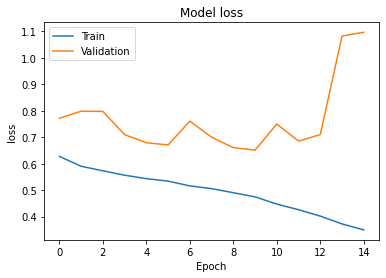

In [256]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

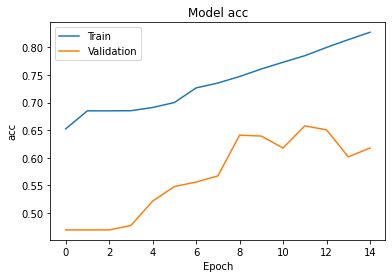

In [257]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [258]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [259]:
pred.shape

(1559, 1)

In [260]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6343810134701732


# ITEMID 300개

In [146]:
itemid = ['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249',
          '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493',
          '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863',
          '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902',
          '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953',
          '51251', '50998', '50924', '50867', '51143', '50852', '50893', '51244', '50967', '51256',
          '50885', '50935', '50993', '50922', '50970', '50908', '50917', '50889', '50964', '51479',
          '51255', '51010', '51301', '51498', '50803', '50976', '51288', '51002', '51257', '51362',
          '50883', '51283', '51007', '51196', '51099', '50907', '51491', '51018', '51218', '50929',
          '50995', '51436', '51221', '50965', '50931', '50927', '51008', '50866', '51427', '51457',
          '51213', '51428', '51001', '50915', '51455', '51431', '50905', '51458', '51446', '51222',
          '51269', '51279', '50950', '51448', '50986', '51447', '51450', '51070', '51146', '51284',
          '50856', '51419', '51434', '51444', '50900', '51128', '51181', '50951', '50997', '50994',
          '51453', '50930', '51439', '51132', '51127', '51245', '51259', '50974', '50891', '51438',
          '51116', '50949', '51131', '51383', '50969', '51429', '51125', '51382', '51118', '51120',
          '51130', '50968', '50966', '51300', '51297', '50890', '50899', '51117', '51384', '50945',
          '50978', '51263', '50805', '50957', '51148', '51206', '51507', '50906', '51232', '50864',
          '50990', '50914', '51422', '50980', '50853', '50892', '51271', '51440', '51114', '51445',
          '51471', '50988', '50881', '51115', '50896', '51454', '50814', '50973', '51110', '50981',
          '51140', '51386', '51123', '50926', '51529', '51199', '50873', '51442', '50943', '51298',
          '51517', '51273', '51441', '51276', '51387', '50989', '51299', '51080', '50865', '51139',
          '51228', '51452', '51302', '51241', '51111', '51149', '51348', '51433', '50991', '50898',
          '51385', '51227', '50958', '51124', '51138', '50895', '51467', '51005', '51210', '51369',
          '51223', '51289', '51204', '51368', '51515', '51225', '51208', '51366', '51272', '51209',
          '51205', '51379', '51112', '51270', '51365', '50972', '50928', '51381', '51380', '51456',
          '50996', '51451', '50877', '51202', '50941', '51377', '50876', '50992', '51122', '51367',
          '50916', '51494', '51432', '50925', '51203', '51521', '51375', '51430', '51435', '51376',
          '50894', '51449', '50913', '51526', '50948', '51119', '51443', '51136', '51337', '51332',
          '51336', '51338', '51280', '51335', '51281', '51278', '51287', '51339', '51333', '51286',
          '51285', '51334', '51320', '51331', '51328', '51291', '51266', '51311', '51310', '51292']
itemid = list(map(int,itemid))

In [147]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29,
 51200: 30,
 51514: 31,
 50909: 32,
 50804: 33,
 51214: 34,
 50882: 35,
 50806: 36,
 50963: 37,
 50820: 38,
 50902: 39,
 50956: 40,
 50911: 41,
 50952: 42,
 50818: 43,
 51144: 44,
 51000: 45,
 50821: 46,
 50824: 47,
 51274: 48,
 50953: 49,
 51251: 50,
 50998: 51,
 50924: 52,
 50867: 53,
 51143: 54,
 50852: 55,
 50893: 56,
 51244: 57,
 50967: 58,
 51256: 59,
 50885: 60,
 50935: 61,
 50993: 62,
 50922: 63,
 50970: 64,
 50908: 65,
 50917: 66,
 50889: 67,
 50964: 68,
 51479: 69,
 51255: 70,
 51010: 71,
 51301: 72,
 51498: 73,
 50803: 74,
 50976: 75,
 51288: 76,
 51002: 77,
 51257: 78,
 51362: 79,
 50883: 80,
 51283: 81,
 51007: 82,
 51196: 83,
 5

In [149]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,300))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.19565054575602214 분
685728.0


In [150]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 300), (6240, 1), (1559, 10, 300), (1559, 1))

In [151]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [152]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 12)            15024     
_________________________________________________________________
lstm_13 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 16,237
Trainable params: 16,237
Non-trainable params: 0
_________________________________________________________________
None


In [153]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 22ms/step - loss: 0.7980 - acc: 0.5973 - val_loss: 0.8655 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6846 - acc: 0.6808 - val_loss: 0.8084 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 8ms/step - loss: 0.6310 - acc: 0.6904 - val_loss: 0.7730 - val_acc: 0.5192
Epoch 4/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5975 - acc: 0.7161 - val_loss: 0.7587 - val_acc: 0.5545
Epoch 5/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5798 - acc: 0.7332 - val_loss: 0.7187 - val_acc: 0.6090
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5678 - acc: 0.7390 - val_loss: 0.7023 - val_acc: 0.6282
Epoch 7/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5620 - acc: 0.7448 - val_loss: 0.6810 - val_acc: 0.6429
Epoch 8/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5608 - 

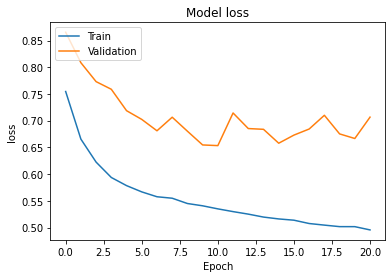

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

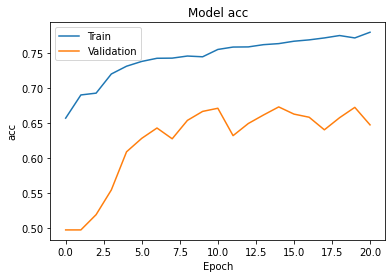

In [155]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [156]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [157]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6363053239255934


In [178]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 10, 256)           570368    
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 767,617
Trainable params: 767,617
Non-trainable params: 0
_________________________________________________________________
None


In [179]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 4s 159ms/step - loss: 0.6498 - acc: 0.6585 - val_loss: 0.7740 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 103ms/step - loss: 0.5878 - acc: 0.6910 - val_loss: 0.7983 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 103ms/step - loss: 0.5709 - acc: 0.6793 - val_loss: 0.7541 - val_acc: 0.4696
Epoch 4/200
10/10 [==============================] - 1s 104ms/step - loss: 0.5438 - acc: 0.6921 - val_loss: 0.7340 - val_acc: 0.4984
Epoch 5/200
10/10 [==============================] - 1s 104ms/step - loss: 0.5321 - acc: 0.7060 - val_loss: 0.6775 - val_acc: 0.5337
Epoch 6/200
10/10 [==============================] - 1s 102ms/step - loss: 0.5278 - acc: 0.7196 - val_loss: 0.7396 - val_acc: 0.5569
Epoch 7/200
10/10 [==============================] - 1s 104ms/step - loss: 0.5009 - acc: 0.7417 - val_loss: 0.6394 - val_acc: 0.6354
Epoch 8/200
10/10 [==============================] - 1s 103ms/step - 

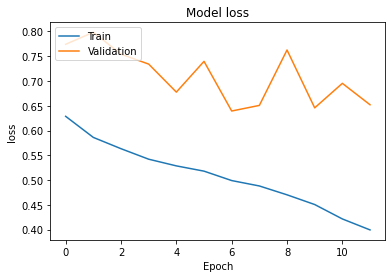

In [180]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

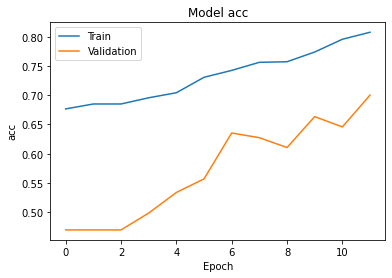

In [181]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [182]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [183]:
pred.shape

(1559, 1)

In [184]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6927517639512508


# ITEMID 400개

In [282]:
itemid=['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249', '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493', '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863', '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902', '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953', '51251', '50998', '50924', '50867', '51143', '50852', '50893', '51244', '50967', '51256', '50885', '50935', '50993', '50922', '50970', '50908', '50917', '50889', '50964', '51479', '51255', '51010', '51301', '51498', '50803', '50976', '51288', '51002', '51257', '51362', '50883', '51283', '51007', '51196', '51099', '50907', '51491', '51018', '51218', '50929', '50995', '51436', '51221', '50965', '50931', '50927', '51008', '50866', '51427', '51457', '51213', '51428', '51001', '50915', '51455', '51431', '50905', '51458', '51446', '51222', '51269', '51279', '50950', '51448', '50986', '51447', '51450', '51070', '51146', '51284', '50856', '51419', '51434', '51444', '50900', '51128', '51181', '50951', '50997', '50994', '51453', '50930', '51439', '51132', '51127', '51245', '51259', '50974', '50891', '51438', '51116', '50949', '51131', '51383', '50969', '51429', '51125', '51382', '51118', '51120', '51130', '50968', '50966', '51300', '51297', '50890', '50899', '51117', '51384', '50945', '50978', '51263', '50805', '50957', '51148', '51206', '51507', '50906', '51232', '50864', '50990', '50914', '51422', '50980', '50853', '50892', '51271', '51440', '51114', '51445', '51471', '50988', '50881', '51115', '50896', '51454', '50814', '50973', '51110', '50981', '51140', '51386', '51123', '50926', '51529', '51199', '50873', '51442', '50943', '51298', '51517', '51273', '51441', '51276', '51387', '50989', '51299', '51080', '50865', '51139', '51228', '51452', '51302', '51241', '51111', '51149', '51348', '51433', '50991', '50898', '51385', '51227', '50958', '51124', '51138', '50895', '51467', '51005', '51210', '51369', '51223', '51289', '51204', '51368', '51515', '51225', '51208', '51366', '51272', '51209', '51205', '51379', '51112', '51270', '51365', '50972', '50928', '51381', '51380', '51456', '50996', '51451', '50877', '51202', '50941', '51377', '50876', '50992', '51122', '51367', '50916', '51494', '51432', '50925', '51203', '51521', '51375', '51430', '51435', '51376', '50894', '51449', '50913', '51526', '50948', '51119', '51443', '51136', '51337', '51332', '51336', '51338', '51280', '51335', '51281', '51278', '51287', '51339', '51333', '51286', '51285', '51334', '51320', '51331', '51328', '51291', '51266', '51311', '51310', '51292', '51309', '51308', '51307', '51306', '51305', '51304', '51303', '51293', '51294', '51295', '51267', '51268', '51312', '51296', '51326', '51325', '51324', '51323', '51322', '51321', '51319', '51313', '51318', '51317', '51290', '51316', '51315', '51314', '50800', '51426', '51340', '51468', '51484', '51481', '51480', '51478', '51477', '51476', '51475', '51474', '51472', '51470', '51469', '51466', '51420', '51465', '51464', '51463', '51462', '51461', '51460', '51459', '51437', '51425', '51424', '51423', '51486', '51487', '51488', '51489', '51533', '51525', '51523', '51520', '51519', '51518', '51513', '51512', '51511', '51510', '51508', '51506', '51505', '51504', '51503', '51502', '51501', '51500', '51499', '51497', '51495', '51492', '51490', '51421', '51418', '51341', '51356', '51374', '51373', '51372', '51370', '51364', '51363', '51361', '51360', '51359', '51358', '51357', '51355', '51417']
itemid=list(map(int,itemid))

In [283]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29,
 51200: 30,
 51514: 31,
 50909: 32,
 50804: 33,
 51214: 34,
 50882: 35,
 50806: 36,
 50963: 37,
 50820: 38,
 50902: 39,
 50956: 40,
 50911: 41,
 50952: 42,
 50818: 43,
 51144: 44,
 51000: 45,
 50821: 46,
 50824: 47,
 51274: 48,
 50953: 49,
 51251: 50,
 50998: 51,
 50924: 52,
 50867: 53,
 51143: 54,
 50852: 55,
 50893: 56,
 51244: 57,
 50967: 58,
 51256: 59,
 50885: 60,
 50935: 61,
 50993: 62,
 50922: 63,
 50970: 64,
 50908: 65,
 50917: 66,
 50889: 67,
 50964: 68,
 51479: 69,
 51255: 70,
 51010: 71,
 51301: 72,
 51498: 73,
 50803: 74,
 50976: 75,
 51288: 76,
 51002: 77,
 51257: 78,
 51362: 79,
 50883: 80,
 51283: 81,
 51007: 82,
 51196: 83,
 5

In [284]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,400))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2134884238243103 분
685728.0


In [285]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 400), (6240, 1), (1559, 10, 400), (1559, 1))

In [286]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [287]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 10, 12)            19824     
_________________________________________________________________
lstm_41 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 13        
Total params: 21,037
Trainable params: 21,037
Non-trainable params: 0
_________________________________________________________________
None


In [288]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 22ms/step - loss: 0.7911 - acc: 0.6571 - val_loss: 0.8699 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 9ms/step - loss: 0.6791 - acc: 0.6860 - val_loss: 0.8126 - val_acc: 0.4974
Epoch 3/200
37/37 [==============================] - 0s 9ms/step - loss: 0.6199 - acc: 0.6977 - val_loss: 0.7578 - val_acc: 0.5481
Epoch 4/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5963 - acc: 0.7144 - val_loss: 0.7439 - val_acc: 0.5808
Epoch 5/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5765 - acc: 0.7297 - val_loss: 0.7445 - val_acc: 0.5853
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5818 - acc: 0.7265 - val_loss: 0.7498 - val_acc: 0.5891
Epoch 7/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5645 - acc: 0.7431 - val_loss: 0.7003 - val_acc: 0.6385
Epoch 8/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5477 - 

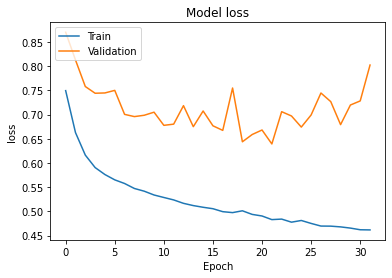

In [289]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

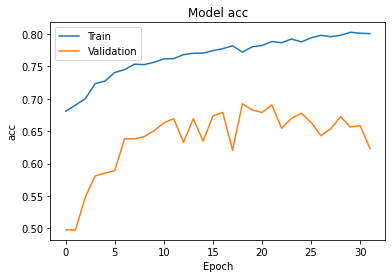

In [290]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [291]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [292]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6241180243745991


In [293]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 10, 256)           672768    
_________________________________________________________________
lstm_43 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 870,017
Trainable params: 870,017
Non-trainable params: 0
_________________________________________________________________
None


In [294]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 4s 190ms/step - loss: 0.6470 - acc: 0.6648 - val_loss: 0.7638 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 109ms/step - loss: 0.5844 - acc: 0.6879 - val_loss: 0.7671 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 109ms/step - loss: 0.5621 - acc: 0.6812 - val_loss: 0.7200 - val_acc: 0.4856
Epoch 4/200
10/10 [==============================] - 1s 109ms/step - loss: 0.5421 - acc: 0.7029 - val_loss: 0.7164 - val_acc: 0.5024
Epoch 5/200
10/10 [==============================] - 1s 109ms/step - loss: 0.5308 - acc: 0.7027 - val_loss: 0.6830 - val_acc: 0.5385
Epoch 6/200
10/10 [==============================] - 1s 109ms/step - loss: 0.5150 - acc: 0.7350 - val_loss: 0.6890 - val_acc: 0.5897
Epoch 7/200
10/10 [==============================] - 1s 107ms/step - loss: 0.5071 - acc: 0.7369 - val_loss: 0.6729 - val_acc: 0.6234
Epoch 8/200
10/10 [==============================] - 1s 108ms/step - 

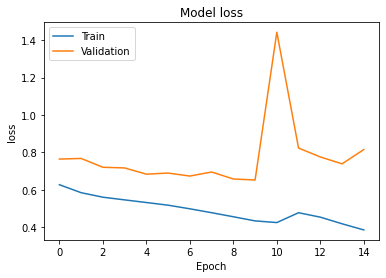

In [295]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

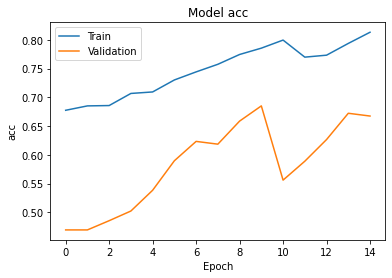

In [296]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [297]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [298]:
pred.shape

(1559, 1)

In [299]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6626042334830019


# ITEMID 500개

In [300]:
itemid=['51277', '50912', '51006', '51003', '51248', '50983', '51237', '51275', '50862', '51249', '51516', '50813', '50960', '50910', '50811', '51009', '50868', '50954', '51250', '51493', '50861', '50809', '50822', '51265', '50878', '51254', '50808', '50971', '51482', '50863', '51200', '51514', '50909', '50804', '51214', '50882', '50806', '50963', '50820', '50902', '50956', '50911', '50952', '50818', '51144', '51000', '50821', '50824', '51274', '50953', '51251', '50998', '50924', '50867', '51143', '50852', '50893', '51244', '50967', '51256', '50885', '50935', '50993', '50922', '50970', '50908', '50917', '50889', '50964', '51479', '51255', '51010', '51301', '51498', '50803', '50976', '51288', '51002', '51257', '51362', '50883', '51283', '51007', '51196', '51099', '50907', '51491', '51018', '51218', '50929', '50995', '51436', '51221', '50965', '50931', '50927', '51008', '50866', '51427', '51457', '51213', '51428', '51001', '50915', '51455', '51431', '50905', '51458', '51446', '51222', '51269', '51279', '50950', '51448', '50986', '51447', '51450', '51070', '51146', '51284', '50856', '51419', '51434', '51444', '50900', '51128', '51181', '50951', '50997', '50994', '51453', '50930', '51439', '51132', '51127', '51245', '51259', '50974', '50891', '51438', '51116', '50949', '51131', '51383', '50969', '51429', '51125', '51382', '51118', '51120', '51130', '50968', '50966', '51300', '51297', '50890', '50899', '51117', '51384', '50945', '50978', '51263', '50805', '50957', '51148', '51206', '51507', '50906', '51232', '50864', '50990', '50914', '51422', '50980', '50853', '50892', '51271', '51440', '51114', '51445', '51471', '50988', '50881', '51115', '50896', '51454', '50814', '50973', '51110', '50981', '51140', '51386', '51123', '50926', '51529', '51199', '50873', '51442', '50943', '51298', '51517', '51273', '51441', '51276', '51387', '50989', '51299', '51080', '50865', '51139', '51228', '51452', '51302', '51241', '51111', '51149', '51348', '51433', '50991', '50898', '51385', '51227', '50958', '51124', '51138', '50895', '51467', '51005', '51210', '51369', '51223', '51289', '51204', '51368', '51515', '51225', '51208', '51366', '51272', '51209', '51205', '51379', '51112', '51270', '51365', '50972', '50928', '51381', '51380', '51456', '50996', '51451', '50877', '51202', '50941', '51377', '50876', '50992', '51122', '51367', '50916', '51494', '51432', '50925', '51203', '51521', '51375', '51430', '51435', '51376', '50894', '51449', '50913', '51526', '50948', '51119', '51443', '51136', '51337', '51332', '51336', '51338', '51280', '51335', '51281', '51278', '51287', '51339', '51333', '51286', '51285', '51334', '51320', '51331', '51328', '51291', '51266', '51311', '51310', '51292', '51309', '51308', '51307', '51306', '51305', '51304', '51303', '51293', '51294', '51295', '51267', '51268', '51312', '51296', '51326', '51325', '51324', '51323', '51322', '51321', '51319', '51313', '51318', '51317', '51290', '51316', '51315', '51314', '50800', '51426', '51340', '51468', '51484', '51481', '51480', '51478', '51477', '51476', '51475', '51474', '51472', '51470', '51469', '51466', '51420', '51465', '51464', '51463', '51462', '51461', '51460', '51459', '51437', '51425', '51424', '51423', '51486', '51487', '51488', '51489', '51533', '51525', '51523', '51520', '51519', '51518', '51513', '51512', '51511', '51510', '51508', '51506', '51505', '51504', '51503', '51502', '51501', '51500', '51499', '51497', '51495', '51492', '51490', '51421', '51418', '51341', '51356', '51374', '51373', '51372', '51370', '51364', '51363', '51361', '51360', '51359', '51358', '51357', '51355', '51417', '51354', '51353', '51352', '51351', '51350', '51347', '51346', '51345', '51344', '51343', '51342', '51378', '51388', '51390', '51391', '51416', '51415', '51413', '51412', '51411', '51410', '51409', '51408', '51407', '51406', '51405', '51404', '51403', '51402', '51401', '51400', '51399', '51398', '51397', '51395', '51394', '51393', '51392', '51264', '51163', '51262', '51004', '51025', '51024', '51023', '51022', '51021', '51020', '51019', '51017', '51016', '51015', '51014', '51012', '51011', '50999', '50938', '50982', '50979', '50977', '50975', '50962', '50961', '50959', '50955', '50947', '50946', '50944', '50942', '50940', '51026', '51027', '51028', '51029', '51060', '51059', '51058', '51057', '51054', '51053', '51052', '51051', '51050', '51049', '51047', '51046', '51045', '51044', '51043', '51042', '51041', '51040', '51039', '51038', '51037', '51036', '51035', '51034', '51032', '51031']
itemid=list(map(int,itemid))

In [301]:
dic_item2idx = {}
for i,j in enumerate(itemid):
    dic_item2idx[j] = i
dic_item2idx

{51277: 0,
 50912: 1,
 51006: 2,
 51003: 3,
 51248: 4,
 50983: 5,
 51237: 6,
 51275: 7,
 50862: 8,
 51249: 9,
 51516: 10,
 50813: 11,
 50960: 12,
 50910: 13,
 50811: 14,
 51009: 15,
 50868: 16,
 50954: 17,
 51250: 18,
 51493: 19,
 50861: 20,
 50809: 21,
 50822: 22,
 51265: 23,
 50878: 24,
 51254: 25,
 50808: 26,
 50971: 27,
 51482: 28,
 50863: 29,
 51200: 30,
 51514: 31,
 50909: 32,
 50804: 33,
 51214: 34,
 50882: 35,
 50806: 36,
 50963: 37,
 50820: 38,
 50902: 39,
 50956: 40,
 50911: 41,
 50952: 42,
 50818: 43,
 51144: 44,
 51000: 45,
 50821: 46,
 50824: 47,
 51274: 48,
 50953: 49,
 51251: 50,
 50998: 51,
 50924: 52,
 50867: 53,
 51143: 54,
 50852: 55,
 50893: 56,
 51244: 57,
 50967: 58,
 51256: 59,
 50885: 60,
 50935: 61,
 50993: 62,
 50922: 63,
 50970: 64,
 50908: 65,
 50917: 66,
 50889: 67,
 50964: 68,
 51479: 69,
 51255: 70,
 51010: 71,
 51301: 72,
 51498: 73,
 50803: 74,
 50976: 75,
 51288: 76,
 51002: 77,
 51257: 78,
 51362: 79,
 50883: 80,
 51283: 81,
 51007: 82,
 51196: 83,
 5

In [302]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((7799,10,500))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    
    
    subidx = dic_sub2idx[sub]
    if item in dic_item2idx:
        itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - charttime).days + 10

    if (dateidx < 0) or (dateidx > 9) :
        continue    
    if flag == 'abnormal':
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.20749991337458293 분
685728.0


In [303]:
arr=x
# 6240을 기준으로 split
X_train = arr[:6240,:,:]
y_train = label[:6240,:]
# y_train = label_2d[:6240,:]


X_test = arr[6240:,:,:]
y_test = label[6240:,:]
# y_test = label_2d[6240:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 10, 500), (6240, 1), (1559, 10, 500), (1559, 1))

In [304]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [305]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 10, 12)            24624     
_________________________________________________________________
lstm_45 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 13        
Total params: 25,837
Trainable params: 25,837
Non-trainable params: 0
_________________________________________________________________
None


In [306]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
37/37 [==============================] - 3s 22ms/step - loss: 0.7832 - acc: 0.6887 - val_loss: 0.8619 - val_acc: 0.4974
Epoch 2/200
37/37 [==============================] - 0s 9ms/step - loss: 0.6764 - acc: 0.6874 - val_loss: 0.7973 - val_acc: 0.4981
Epoch 3/200
37/37 [==============================] - 0s 9ms/step - loss: 0.6269 - acc: 0.6902 - val_loss: 0.7504 - val_acc: 0.5487
Epoch 4/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5858 - acc: 0.7270 - val_loss: 0.7440 - val_acc: 0.5679
Epoch 5/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5674 - acc: 0.7420 - val_loss: 0.7044 - val_acc: 0.6167
Epoch 6/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5598 - acc: 0.7469 - val_loss: 0.7024 - val_acc: 0.6244
Epoch 7/200
37/37 [==============================] - 0s 9ms/step - loss: 0.5628 - acc: 0.7428 - val_loss: 0.6925 - val_acc: 0.6397
Epoch 8/200
37/37 [==============================] - 0s 8ms/step - loss: 0.5439 - 

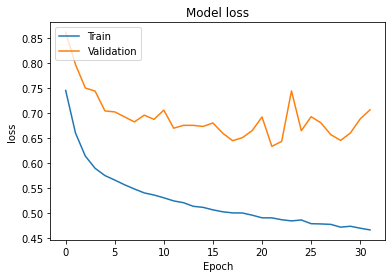

In [307]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

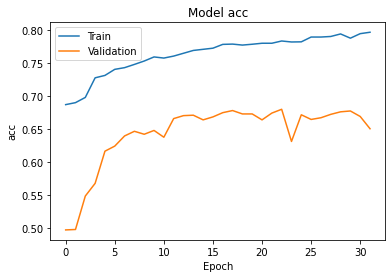

In [308]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [309]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [310]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6549069916613214


In [311]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 10, 256)           775168    
_________________________________________________________________
lstm_47 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 972,417
Trainable params: 972,417
Non-trainable params: 0
_________________________________________________________________
None


In [312]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 4s 168ms/step - loss: 0.6579 - acc: 0.5814 - val_loss: 0.7740 - val_acc: 0.4696
Epoch 2/200
10/10 [==============================] - 1s 110ms/step - loss: 0.5847 - acc: 0.6877 - val_loss: 0.7795 - val_acc: 0.4696
Epoch 3/200
10/10 [==============================] - 1s 111ms/step - loss: 0.5662 - acc: 0.6842 - val_loss: 0.7288 - val_acc: 0.4784
Epoch 4/200
10/10 [==============================] - 1s 112ms/step - loss: 0.5462 - acc: 0.6984 - val_loss: 0.6992 - val_acc: 0.5096
Epoch 5/200
10/10 [==============================] - 1s 113ms/step - loss: 0.5316 - acc: 0.7110 - val_loss: 0.7075 - val_acc: 0.5345
Epoch 6/200
10/10 [==============================] - 1s 110ms/step - loss: 0.5142 - acc: 0.7366 - val_loss: 0.6836 - val_acc: 0.6154
Epoch 7/200
10/10 [==============================] - 1s 114ms/step - loss: 0.4960 - acc: 0.7533 - val_loss: 0.6793 - val_acc: 0.6266
Epoch 8/200
10/10 [==============================] - 1s 112ms/step - 

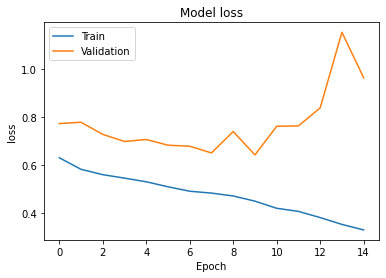

In [313]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

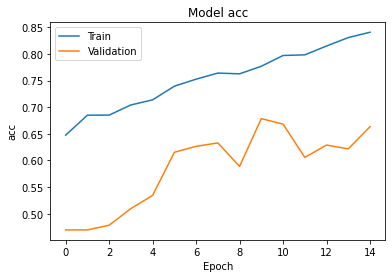

In [314]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [315]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [316]:
pred.shape

(1559, 1)

In [317]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6613213598460551
